In [3]:
import numpy as np
import matplotlib.pyplot as plt

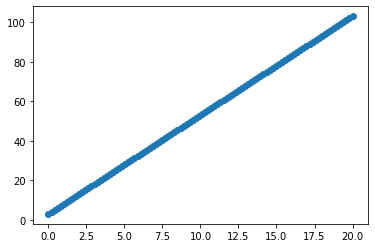

In [4]:
# First let's define x, y, w, b
x = np.linspace(0, 20, 100)
w = 5
b = 3
y = (w*x + b)

plt.scatter(x, y)
plt.show()

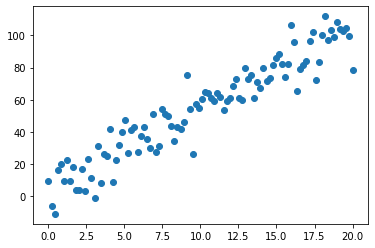

In [5]:
epsilon = np.random.normal(size=(100))*10 # normally distributed noise
# print(epsilon)
noisy_y = y + epsilon

plt.scatter(x, noisy_y)
plt.show()

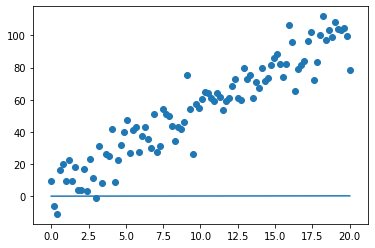

In [6]:
theta = [0.01, -0.01]

# Let's define our loss function := sum((y-yhat)**2), and our hypothesis predictiction, yhat := theta[0] * x + theta[1]
def yhat(x):
    return theta[0] * x + theta[1]

def mean_squared_error(noisy_y, x):
    return sum((noisy_y - yhat(x))**2)

# Now let's plot our current guess
plt.plot(x, yhat(x))
plt.scatter(x, noisy_y, label='Our initial guess for {0}x + {1}'.format(w, b))
plt.show()

Estimated 5.273543760281672x + 0.8759226475929545


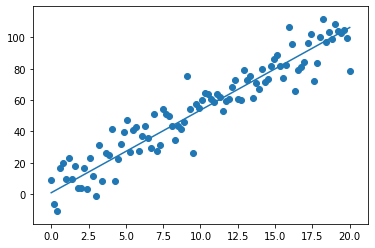

[390781.6406855271, 50629.70349985753, 14428.131198538971, 10574.416832950963, 10163.31908430339, 10118.603544525795, 10112.882589074829, 10111.314050759876, 10110.189852936492, 10109.115358201207, 10108.048561260226, 10106.984985635327, 10105.924148860151, 10104.865993545509, 10103.810507556198, 10102.757683588366, 10101.707514867496, 10100.659994690543, 10099.615116377132, 10098.572873264378, 10097.533258706255, 10096.496266073487, 10095.461888753556, 10094.430120150584, 10093.400953685346, 10092.374382795208, 10091.350400934085, 10090.329001572405, 10089.310178197053, 10088.293924311361, 10087.280233435027, 10086.269099104093, 10085.260514870914, 10084.254474304105, 10083.250970988485, 10082.249998525072, 10081.25155053102, 10080.255620639566, 10079.26220250001, 10078.271289777671, 10077.282876153859, 10076.296955325797, 10075.313521006608, 10074.332566925279, 10073.35408682661, 10072.378074471173, 10071.404523635281, 10070.433428110933, 10069.464781705796, 10068.49857824316, 10067.

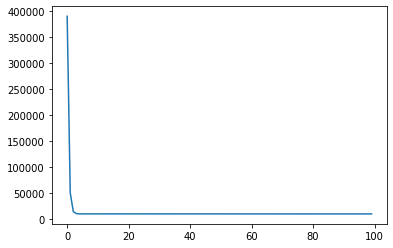

In [7]:
# learning rate/Alpha
learning_rate = 1e-4

# Let's define the number of training iterations and a metric to record our loss
epochs = 100
historical_loss = []

# Finally let's train
for i in range(epochs):
    historical_loss.append(mean_squared_error(noisy_y,x)) # record loss
    guesses = yhat(x) # make our prediction
    theta[0] -= learning_rate * sum(((noisy_y - guesses)/2) * (-1) * x) # update theta[0] (our guess for w)
    theta[1] -= learning_rate * sum(((noisy_y - guesses)/2) * (-1) * (1)) # update theta[1] (our guess for b)
    
# Plot our regression
print('Estimated {0}x + {1}'.format(theta[0], theta[1]))
plt.plot(x, yhat(x))
plt.scatter(x, noisy_y)
plt.show()

# Plot our loss function
print(historical_loss)
plt.plot(historical_loss)
plt.show()

In [9]:
import torch
import torchvision
import torchvision.transforms as transforms

In [10]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


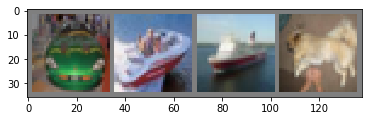

  car  ship  ship   dog


In [12]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
# plt.imshow(torchvision.utils.make_grid(images))
imshow(torchvision.utils.make_grid(images))
# imshow(images)
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [4]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [5]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [6]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.163
[1,  4000] loss: 1.827
[1,  6000] loss: 1.646
[1,  8000] loss: 1.554
[1, 10000] loss: 1.485
[1, 12000] loss: 1.458
[2,  2000] loss: 1.400
[2,  4000] loss: 1.364
[2,  6000] loss: 1.341
[2,  8000] loss: 1.311
[2, 10000] loss: 1.299
[2, 12000] loss: 1.268
Finished Training


In [7]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

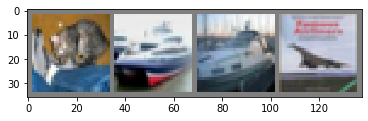

GroundTruth:    cat  ship  ship plane


In [8]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [9]:
net = Net()
net.load_state_dict(torch.load(PATH))
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship  ship


In [10]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 55 %


In [11]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 60 %
Accuracy of   car : 65 %
Accuracy of  bird : 27 %
Accuracy of   cat : 42 %
Accuracy of  deer : 47 %
Accuracy of   dog : 36 %
Accuracy of  frog : 77 %
Accuracy of horse : 63 %
Accuracy of  ship : 70 %
Accuracy of truck : 64 %


In [10]:
import torch
from torch import nn, optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from time import time

In [20]:
import numpy as np
import pandas as pd

In [2]:
# transform = transforms.Compose([transforms.ToTensor(),
#                                transforms.Normalize(0.5, 0.5)])
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])


trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
# trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
#                                           shuffle=True, num_workers=2)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
# testloader = torch.utils.data.DataLoader(testset, batch_size=4,
#                                          shuffle=False, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

torch.Size([64, 1, 28, 28])
torch.Size([64])


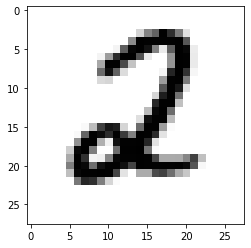

In [3]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

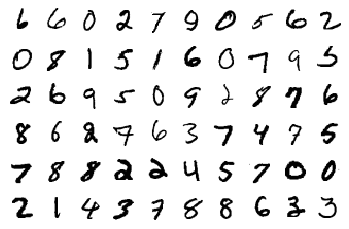

In [4]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [29]:
class NeuralNet(nn.Module):
    
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNet, self).__init__()

        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        output = self.layer1(x)
        output = self.relu(output)
        output = self.layer2(output)
        
        return output

In [32]:
input_size = 784  # MNIST pixel size is 28x28 = 784
hidden_size = 500
output_size = 10  # classifying digits from 0-9, so 10 possible outputs
num_epochs = 5

learning_rate = 0.001

model = NeuralNet(input_size, hidden_size, output_size)
# print(model)
# samplebatch = next(iter(trainloader))

# print(np.asarray(samplebatch).shape)

# model(samplebatch)
lossFunction = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [34]:

for epoch in range(num_epochs):
    running_loss = 0
    for i, (images,labels) in enumerate(trainloader):
        # Flatten MNIST images into a 784 long vector
        images = images.reshape(-1,28*28)
        
        # Training pass
        optimizer.zero_grad()
        
#         show_batch(images)
        out = model(images)
        loss = lossFunction(out,labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    print('Epoch: %d | loss: %.3f' % (epoch + 1, running_loss / 5000))
        


Epoch: 1 | loss: 0.019
Epoch: 2 | loss: 0.016
Epoch: 3 | loss: 0.013
Epoch: 4 | loss: 0.012
Epoch: 5 | loss: 0.010


In [37]:

correct = 0
total = 0

with torch.no_grad():
    for images,labels in testloader:
        images = images.reshape(-1,28*28)
        
        out = model(images) # the predictions
        _,predicted = torch.max(out.data,1)
        
        total += labels.size(0)
        correct += (predicted==labels).sum().item()
        
print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

Accuracy of the network on the 10000 test images: 97.21 %
